In [8]:
import pandas as pd

In [5]:
news_data = pd.read_csv('IndianFinancialNews.csv')

In [99]:
news_data.head()

,Date,Title,Description,Date_date_time,Entity_Ind
0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10,0.0
1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10,1.0
2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10,0.0
3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11,0.0
4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11,1.0


In [7]:
news_data.drop('Unnamed: 0',axis = 1,inplace=True)

In [8]:
news_data.head()

,Date,Title,Description
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...


In [9]:
# news_data['Date_MM_dd'] = news_data['Date'].str.split(',')[0]
# news_data['Date_yyyy'] = news_data['Date'].str.split(',')[1]
# news_data['Date_Day'] = news_data['Date'].str.split(',')[2]

In [10]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
Date           50000 non-null object
Title          50000 non-null object
Description    49290 non-null object
dtypes: object(3)
memory usage: 1.1+ MB


In [11]:
news_data.shape

(50000, 3)

In [12]:
news_data['Date_date_time'] = pd.to_datetime(news_data['Date'], format='%B %d, %Y, %A')

In [13]:
news_data.head(10)

,Date,Title,Description,Date_date_time
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,...",2020-05-26
1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex...",2020-05-26
2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...,2020-05-25
3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...,2020-05-24
4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...,2020-05-23
5,"May 23, 2020, Saturday","Bank of Baroda to advance Rs 12,000 crore to M...","Under the scheme, the government will offer 10...",2020-05-23
6,"May 22, 2020, Friday","Retail, MSME loans to get cheaper as RBI cuts ...",HDFC Bank cuts base rate by 55 bps; SBI calls ...,2020-05-22
7,"May 22, 2020, Friday","RBI forecasts economic contraction, announces ...",The six-member MPC also kept policy stance unc...,2020-05-22
8,"May 22, 2020, Friday","RBI extends loan moratorium till Aug 31, silen...",The central bank has increased group exposure ...,2020-05-22
9,"May 22, 2020, Friday","Govt seeks to raise Rs 14,000 cr from second t...",Two new series will have maturities of April 2...,2020-05-22


In [14]:
news_data = news_data.sort_values(by='Date_date_time')
news_data.reset_index(drop=True,inplace=True)

In [15]:
news_data.head()

,Date,Title,Description,Date_date_time
0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10
1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10
2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10
3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11
4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11


In [100]:
# Spacy
import spacy
from spacy import displacy
from collections import Counter
from pprint import pprint
import en_core_web_sm
nlp = en_core_web_sm.load()
# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent
# Stanza
import stanza
nlps = stanza.Pipeline(lang='en', processors='tokenize,ner')

2021-01-09 21:24:18 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| ner       | ontonotes |

2021-01-09 21:24:18 INFO: Use device: cpu
2021-01-09 21:24:18 INFO: Loading: tokenize
2021-01-09 21:24:18 INFO: Loading: ner
2021-01-09 21:24:20 INFO: Done loading processors!


In [52]:
sentence = news_data.loc[8,'Title']

# Spacy technique to extract entities
print("*********Spacy*********")
doc = nlp(sentence)
print([(X.text, X.label_) for X in doc.ents])
# NLTK texhnique to extract entities
print("*********NLTK*********")
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(sentence)))
print(ne_tree)
# Stanza technique to extract entities
print("*********Stanza*********")
doc_ = nlps(sentence)
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc_.ents], sep='\n')

*********Spacy*********
[('Uti Bank Eyes Pref', 'ORG')]
*********NLTK*********
(S
  (PERSON Uti/NNP)
  (ORGANIZATION Bank/NNP Eyes/NNP)
  Pref/NNP
  Issue/NNP
  As/IN
  (PERSON Tata/NNP Plan/NNP Hits/NNP Roadblock/NNP))
*********Stanza*********
entity: Uti Bank Eyes	type: ORG


In [91]:
#Spacy condition
print(sum([1 for X in doc.ents if X.label_=='ORG']) > 0)
# NLTK condition
print('ORGANIZATION' in str(ne_tree.flatten))
# Stanza condition
print(sum([1 for X in doc_.ents if X.type=='ORG']) > 0)

True
True
True


In [17]:
from tqdm import tqdm

In [102]:
for rows in tqdm(range(news_data.shape[0])):
    sentence = news_data.loc[rows,'Title']
    # Spacy technique to extract entities
    doc = nlp(sentence)
    # NLTK technique to extract entities
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(sentence)))
    # Stanza technique to extract entities
    doc_ = nlps(sentence)
    if sum([1 for X in doc.ents if X.label_=='ORG']) > 0 or 'ORGANIZATION' in str(ne_tree.flatten) or sum([1 for X in doc_.ents if X.type=='ORG']) > 0:
        news_data.loc[rows,'Entity_Ind'] = 1
    else:
        news_data.loc[rows,'Entity_Ind'] = 0

100%|██████████| 50000/50000 [2:10:42<00:00,  6.38it/s]  


In [104]:
news_data[news_data['Entity_Ind']==0]

,Date,Title,Description,Date_date_time,Entity_Ind
0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10,0.0
2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10,0.0
3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11,0.0
7,"February 12, 2003, Wednesday","Lic Swaps Rs 1,700 Crore Gilts With Sbi","Lic Swaps Rs 1,700 Crore Gilts With Sbi",2003-02-12,0.0
14,"February 12, 2003, Wednesday","Mfg Data, War Fears Scythe Gilts","Mfg Data, War Fears Scythe Gilts",2003-02-12,0.0
...,...,...,...,...,...
49973,"May 15, 2020, Friday","Stimulus 2.0: Banks will monitor solvency, gua...",While the issue of providing liquidity to exis...,2020-05-15,0.0
49975,"May 18, 2020, Monday","All for liquidity: Watch every rupee, chase du...",Refinancing high-cost debt into low-cost debt ...,2020-05-18,0.0
49984,"May 21, 2020, Thursday",Bank credit growth slowed in Dec quarter on mu...,Loans sanctioned by public sector banks (PSBs)...,2020-05-21,0.0
49987,"May 21, 2020, Thursday",Covid-19: Banking slippages may rise by Rs 5.5...,While slippages from the corporate sector may ...,2020-05-21,0.0


In [105]:
news_data.to_excel('news_data.xlsx',index=False)

In [26]:
news_data = pd.read_excel('news_data.xlsx')

In [10]:
news_data.head()

,Date,Title,Description,Date_date_time,Entity_Ind
0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10,0
1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10,1
2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10,0
3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11,0
4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11,1


In [11]:
news_data = news_data[news_data['Entity_Ind'] == 1]

In [27]:
news_data.shape

(50000, 5)

In [13]:
news_data.head()

,Date,Title,Description,Date_date_time,Entity_Ind
1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10,1
4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11,1
5,"February 11, 2003, Tuesday",Lic Mops Up Government Securities As Prices Crash,Lic Mops Up Government Securities As Prices Crash,2003-02-11,1
6,"February 11, 2003, Tuesday",Uti Bank Rolls Out At Par Facility,Uti Bank Rolls Out At Par Facility,2003-02-11,1
7,"February 12, 2003, Wednesday","Lic Swaps Rs 1,700 Crore Gilts With Sbi","Lic Swaps Rs 1,700 Crore Gilts With Sbi",2003-02-12,1


In [28]:
news_data.reset_index(drop=True,inplace=True)

In [159]:
temp_data = pd.DataFrame(columns=['subject','relation','object'])

In [171]:
temp_data = temp_data.append({'subject': 'Lic Swaps Rs 1,700 Crore Gilts', 'relation': 'is With', 'object': 'Sbi'},ignore_index=True)

In [161]:
type({'subject': '', 'relation': '', 'object': ''})

dict

In [172]:
temp_data

,subject,relation,object
0,"Lic Swaps Rs 1,700 Crore Gilts",is With,Sbi


In [15]:
from openie import StanfordOpenIE

In [29]:
%%time
temp_data = pd.DataFrame(columns=['subject','relation','object'])
with StanfordOpenIE() as client:
    for row in tqdm(range(news_data.shape[0])):
        text = news_data.loc[row,'Title']
#         print('Text: %s.' % text)
        tup = client.annotate(text)
        if len(tup) > 0:
            temp_data = temp_data.append(tup[0],ignore_index=True)
        else:
            temp_data = temp_data.append({'subject': '', 'relation': '', 'object': ''},ignore_index=True)
#         print(f'Open IE text {tup}')
        

#     graph_image = 'graph.png'
#     client.generate_graphviz_graph(text, graph_image)
#     print('Graph generated: %s.' % graph_image)

#     with open('corpus/pg6130.txt', 'r', encoding='utf8') as r:
#         corpus = r.read().replace('\n', ' ').replace('\r', '')

#     triples_corpus = client.annotate(corpus[0:50000])
#     print('Corpus: %s [...].' % corpus[0:80])
#     print('Found %s triples in the corpus.' % len(triples_corpus))
#     for triple in triples_corpus[:3]:
#         print('|-', triple)

  0%|          | 0/50000 [00:00<?, ?it/s]

Starting server with command: java -Xmx8G -cp /Users/abhideb/stanfordnlp_resources/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-2f426a7162ff4b7f.props -preload openie


100%|██████████| 50000/50000 [26:39<00:00, 31.27it/s]  

CPU times: user 11min 38s, sys: 1min 8s, total: 12min 47s
Wall time: 26min 39s


In [30]:
import numpy as np
temp_data_bckup = temp_data.copy()

In [31]:
temp_data = temp_data.replace('',np.nan)

In [188]:
# count_empty = 0
# for rows in tqdm(range(temp_data.shape[0])):
#     if len(temp_data.loc[rows,'subject']) == 0:
#         count_empty += 1

In [32]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
subject     31030 non-null object
relation    31030 non-null object
object      31030 non-null object
dtypes: object(3)
memory usage: 1.1+ MB


In [33]:
temp_data.isnull().sum()

subject     18970
relation    18970
object      18970
dtype: int64

In [34]:
temp_data.head()

,subject,relation,object
0,Loans,Divide,Consortiums
1,Rbi Calls,Meet,Push
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [35]:
news_data_combined = news_data.merge(temp_data,left_on=news_data.index,right_on=temp_data.index,indicator=True)

In [36]:
news_data_combined.head()

,key_0,Date,Title,Description,Date_date_time,Entity_Ind,subject,relation,object,_merge
0,0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10,0,Loans,Divide,Consortiums,both
1,1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10,1,Rbi Calls,Meet,Push,both
2,2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10,0,NaN,NaN,NaN,both
3,3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11,0,NaN,NaN,NaN,both
4,4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11,1,NaN,NaN,NaN,both


In [37]:
news_data_combined['_merge'].value_counts()

both          50000
right_only        0
left_only         0
Name: _merge, dtype: int64

In [167]:
with StanfordOpenIE() as client:
    text = 'Lic Mops Up Government Securities As Prices Crash'
    print('Text: %s.' % text)
    for triple in client.annotate(text):
        print('|-', triple)

Text: Lic Mops Up Government Securities As Prices Crash.
Starting server with command: java -Xmx8G -cp /Users/abhideb/stanfordnlp_resources/stanford-corenlp-full-2018-10-05/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-0e3761a79d024f4c.props -preload openie


In [132]:
tex_tup

[{'subject': 'Rbi Calls', 'relation': 'Meet', 'object': 'Push'}]

In [125]:
news_data.to_excel('news_data_final.xlsx',index=False)

In [124]:
news_data.tail()

,Date,Title,Description,Date_date_time,Entity_Ind
49994,"May 23, 2020, Saturday","Bank of Baroda to advance Rs 12,000 crore to M...","Under the scheme, the government will offer 10...",2020-05-23,1
49995,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...,2020-05-23,1
49996,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...,2020-05-24,1
49997,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...,2020-05-25,1
49998,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex...",2020-05-26,1


In [13]:
len(news_data['Date_date_time'].value_counts())

6068

In [14]:
print(news_data['Date_date_time'].min())
print(news_data['Date_date_time'].max())

2003-02-10 00:00:00
2020-05-26 00:00:00


In [38]:
sensex_data = pd.read_csv('BSESENSEX.csv',parse_dates=True)

In [39]:
sensex_data.head()

,Date,Open,High,Low,Close
2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN
2003-02-11,3269.85,3278.79,3249.63,3261.47,NaN
2003-02-12,3266.26,3268.39,3236.33,3247.51,NaN
2003-02-14,3250.65,3254.04,3218.37,3223.41,NaN
2003-02-17,3248.90,3287.01,3248.90,3282.45,NaN


In [40]:
sensex_data.shape

(4295, 5)

In [41]:
sensex_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2003-02-10 to 2020-05-26
Data columns (total 5 columns):
Date     4295 non-null float64
Open     4295 non-null float64
High     4295 non-null float64
Low      4295 non-null float64
Close    0 non-null float64
dtypes: float64(5)
memory usage: 201.3 KB


In [42]:
sensex_data.index

DatetimeIndex(['2003-02-10', '2003-02-11', '2003-02-12', '2003-02-14',
               '2003-02-17', '2003-02-18', '2003-02-19', '2003-02-20',
               '2003-02-21', '2003-02-24',
               ...
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-26'],
              dtype='datetime64[ns]', length=4295, freq=None)

In [43]:
sensex_data = sensex_data.rename(columns={'Date':'Open','Open':'High','High':'Low','Low':'CLose'})

In [44]:
sensex_data.drop('Close',axis = 1,inplace = True)
sensex_data.rename(columns={'CLose':'Close'},inplace=True)
sensex_data.reset_index(inplace=True)
sensex_data.rename(columns={'index':'Date'},inplace=True)
sensex_data.head()

,Date,Open,High,Low,Close
0,2003-02-10,3281.37,3281.42,3252.49,3256.86
1,2003-02-11,3269.85,3278.79,3249.63,3261.47
2,2003-02-12,3266.26,3268.39,3236.33,3247.51
3,2003-02-14,3250.65,3254.04,3218.37,3223.41
4,2003-02-17,3248.90,3287.01,3248.90,3282.45


In [45]:
sensex_data.head()

,Date,Open,High,Low,Close
0,2003-02-10,3281.37,3281.42,3252.49,3256.86
1,2003-02-11,3269.85,3278.79,3249.63,3261.47
2,2003-02-12,3266.26,3268.39,3236.33,3247.51
3,2003-02-14,3250.65,3254.04,3218.37,3223.41
4,2003-02-17,3248.90,3287.01,3248.90,3282.45


In [46]:
sensex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 5 columns):
Date     4295 non-null datetime64[ns]
Open     4295 non-null float64
High     4295 non-null float64
Low      4295 non-null float64
Close    4295 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 167.9 KB


In [47]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
Date              50000 non-null object
Title             50000 non-null object
Description       49290 non-null object
Date_date_time    50000 non-null datetime64[ns]
Entity_Ind        50000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.9+ MB


In [50]:
len(news_data_combined['Date_date_time'].value_counts())

6068

In [49]:
len(sensex_data['Date'].value_counts())

4295

In [51]:
print(sensex_data['Date'].min())
print(sensex_data['Date'].max())

2003-02-10 00:00:00
2020-05-26 00:00:00


In [52]:
sensex_data['Date'].max() - sensex_data['Date'].min()

Timedelta('6315 days 00:00:00')

In [53]:
news_data['Date_date_time'].max() - news_data['Date_date_time'].min()

Timedelta('6315 days 00:00:00')

In [79]:
# news_data_combined = news_data_combined.drop('_merge',axis=1)
news_sensex_data = pd.merge(news_data_combined,sensex_data,left_on='Date_date_time',right_on='Date',indicator=True)

In [80]:
news_sensex_data.head()

,key_0,Date_x,Title,Description,Date_date_time,Entity_Ind,subject,relation,object,Date_y,Open,High,Low,Close,Target_Var,_merge
0,0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10,0,Loans,Divide,Consortiums,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN,both
1,1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10,1,Rbi Calls,Meet,Push,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN,both
2,2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10,0,NaN,NaN,NaN,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN,both
3,3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11,0,NaN,NaN,NaN,2003-02-11,3269.85,3278.79,3249.63,3261.47,1.0,both
4,4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11,1,NaN,NaN,NaN,2003-02-11,3269.85,3278.79,3249.63,3261.47,1.0,both


In [58]:
news_sensex_data.shape

(40288, 15)

In [81]:
news_sensex_data['_merge'].value_counts()

both          40288
right_only        0
left_only         0
Name: _merge, dtype: int64

In [60]:
news_sensex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40288 entries, 0 to 40287
Data columns (total 15 columns):
key_0             40288 non-null int64
Date_x            40288 non-null object
Title             40288 non-null object
Description       39685 non-null object
Date_date_time    40288 non-null datetime64[ns]
Entity_Ind        40288 non-null int64
subject           25058 non-null object
relation          25058 non-null object
object            25058 non-null object
Date_y            40288 non-null datetime64[ns]
Open              40288 non-null float64
High              40288 non-null float64
Low               40288 non-null float64
Close             40288 non-null float64
_merge            40288 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 4.6+ MB


In [62]:
news_sensex_data.isnull().sum()

key_0                 0
Date_x                0
Title                 0
Description         603
Date_date_time        0
Entity_Ind            0
subject           15230
relation          15230
object            15230
Date_y                0
Open                  0
High                  0
Low                   0
Close                 0
_merge                0
dtype: int64

In [64]:
pd.DataFrame(news_sensex_data['subject'].value_counts()).to_excel("news_entities.xlsx")

In [53]:
len(news_sensex_data['Date_y'].value_counts())

4274

In [54]:
news_sensex_data.drop('_merge',axis=1,inplace=True)
news_sensex_data.rename(columns={'Date_x':'News_Date_Informal','Date_date_time':'News_Date','Date_y':'BSE_SENSEX_Date'},inplace=True)

In [82]:
news_sensex_data.head()

,key_0,Date_x,Title,Description,Date_date_time,Entity_Ind,subject,relation,object,Date_y,Open,High,Low,Close,Target_Var,_merge
0,0,"February 10, 2003, Monday",Sticky Loans Divide Consortiums,Sticky Loans Divide Consortiums,2003-02-10,0,Loans,Divide,Consortiums,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN,both
1,1,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits,Rbi Calls Meet To Push Floating Rate Deposits,2003-02-10,1,Rbi Calls,Meet,Push,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN,both
2,2,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore","Net Scheduled Inflows Of Rs 1,559.9 Crore",2003-02-10,0,NaN,NaN,NaN,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN,both
3,3,"February 11, 2003, Tuesday",Crisil Scripts Risk Gauge Tool For Film Industry,Crisil Scripts Risk Gauge Tool For Film Industry,2003-02-11,0,NaN,NaN,NaN,2003-02-11,3269.85,3278.79,3249.63,3261.47,1.0,both
4,4,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...,Banks Plan To Raise Lending Rates Without Alte...,2003-02-11,1,NaN,NaN,NaN,2003-02-11,3269.85,3278.79,3249.63,3261.47,1.0,both


In [56]:
news_sensex_data.to_csv('news_sensex_data.csv',index=False)

In [1]:
from openie import StanfordOpenIE

# with StanfordOpenIE() as client:
#     text = 'Barack Obama was born in Hawaii. Richard Manning wrote this sentence.'
#     print('Text: %s.' % text)
#     for triple in client.annotate(text):
#         print('|-', triple)

In [3]:
import fasttext

In [4]:
model = fasttext.train_unsupervised("input.txt", model='skipgram')

ValueError: Empty vocabulary. Try a smaller -minCount value.

In [65]:
sensex_data.head()

,Date,Open,High,Low,Close
0,2003-02-10,3281.37,3281.42,3252.49,3256.86
1,2003-02-11,3269.85,3278.79,3249.63,3261.47
2,2003-02-12,3266.26,3268.39,3236.33,3247.51
3,2003-02-14,3250.65,3254.04,3218.37,3223.41
4,2003-02-17,3248.90,3287.01,3248.90,3282.45


In [71]:
for i in range(1,sensex_data.shape[0]):
    if sensex_data.loc[i-1,'Close'] < sensex_data.loc[i,'Open']:
        sensex_data.loc[i,'Target_Var'] = 1
    else:
        sensex_data.loc[i,'Target_Var'] = 0

In [214]:
sensex_data['Target_Var'].value_counts()

1.0    3067
0.0    1227
Name: Target_Var, dtype: int64

In [216]:
sensex_data.to_csv('target.csv')

In [76]:
sensex_data['Target_Var'].value_counts()/len(sensex_data)

1.0    0.714086
0.0    0.285681
Name: Target_Var, dtype: float64

In [77]:
sensex_data.head()

,Date,Open,High,Low,Close,Target_Var
0,2003-02-10,3281.37,3281.42,3252.49,3256.86,NaN
1,2003-02-11,3269.85,3278.79,3249.63,3261.47,1.0
2,2003-02-12,3266.26,3268.39,3236.33,3247.51,1.0
3,2003-02-14,3250.65,3254.04,3218.37,3223.41,1.0
4,2003-02-17,3248.90,3287.01,3248.90,3282.45,1.0


In [88]:
news_sensex_data['Target_Var'].value_counts()

1.0    27980
0.0    12305
Name: Target_Var, dtype: int64

In [89]:
news_sensex_data['Target_Var'].value_counts()/len(news_sensex_data)

1.0    0.694500
0.0    0.305426
Name: Target_Var, dtype: float64

In [83]:
temp = news_sensex_data.drop_duplicates('Date_date_time')

In [86]:
temp['Target_Var'].value_counts()

1.0    3050
0.0    1223
Name: Target_Var, dtype: int64

In [85]:
temp['Target_Var'].value_counts()/len(temp)

1.0    0.713617
0.0    0.286149
Name: Target_Var, dtype: float64

In [87]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4274 entries, 0 to 40286
Data columns (total 16 columns):
key_0             4274 non-null int64
Date_x            4274 non-null object
Title             4274 non-null object
Description       4217 non-null object
Date_date_time    4274 non-null datetime64[ns]
Entity_Ind        4274 non-null int64
subject           2640 non-null object
relation          2640 non-null object
object            2640 non-null object
Date_y            4274 non-null datetime64[ns]
Open              4274 non-null float64
High              4274 non-null float64
Low               4274 non-null float64
Close             4274 non-null float64
Target_Var        4273 non-null float64
_merge            4274 non-null category
dtypes: category(1), datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 538.5+ KB


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(returns[1:]

In [91]:
sns.set(style="darkgrid")

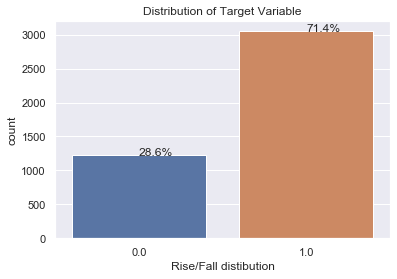

In [107]:
ax = sns.countplot(x="Target_Var", data=temp)

plt.title('Distribution of Target Variable')
plt.xlabel('Rise/Fall distibution')

total = len(temp['Target_Var'])
# print(total)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 0.4
    ax.annotate(percentage, (x, y))

plt.show()

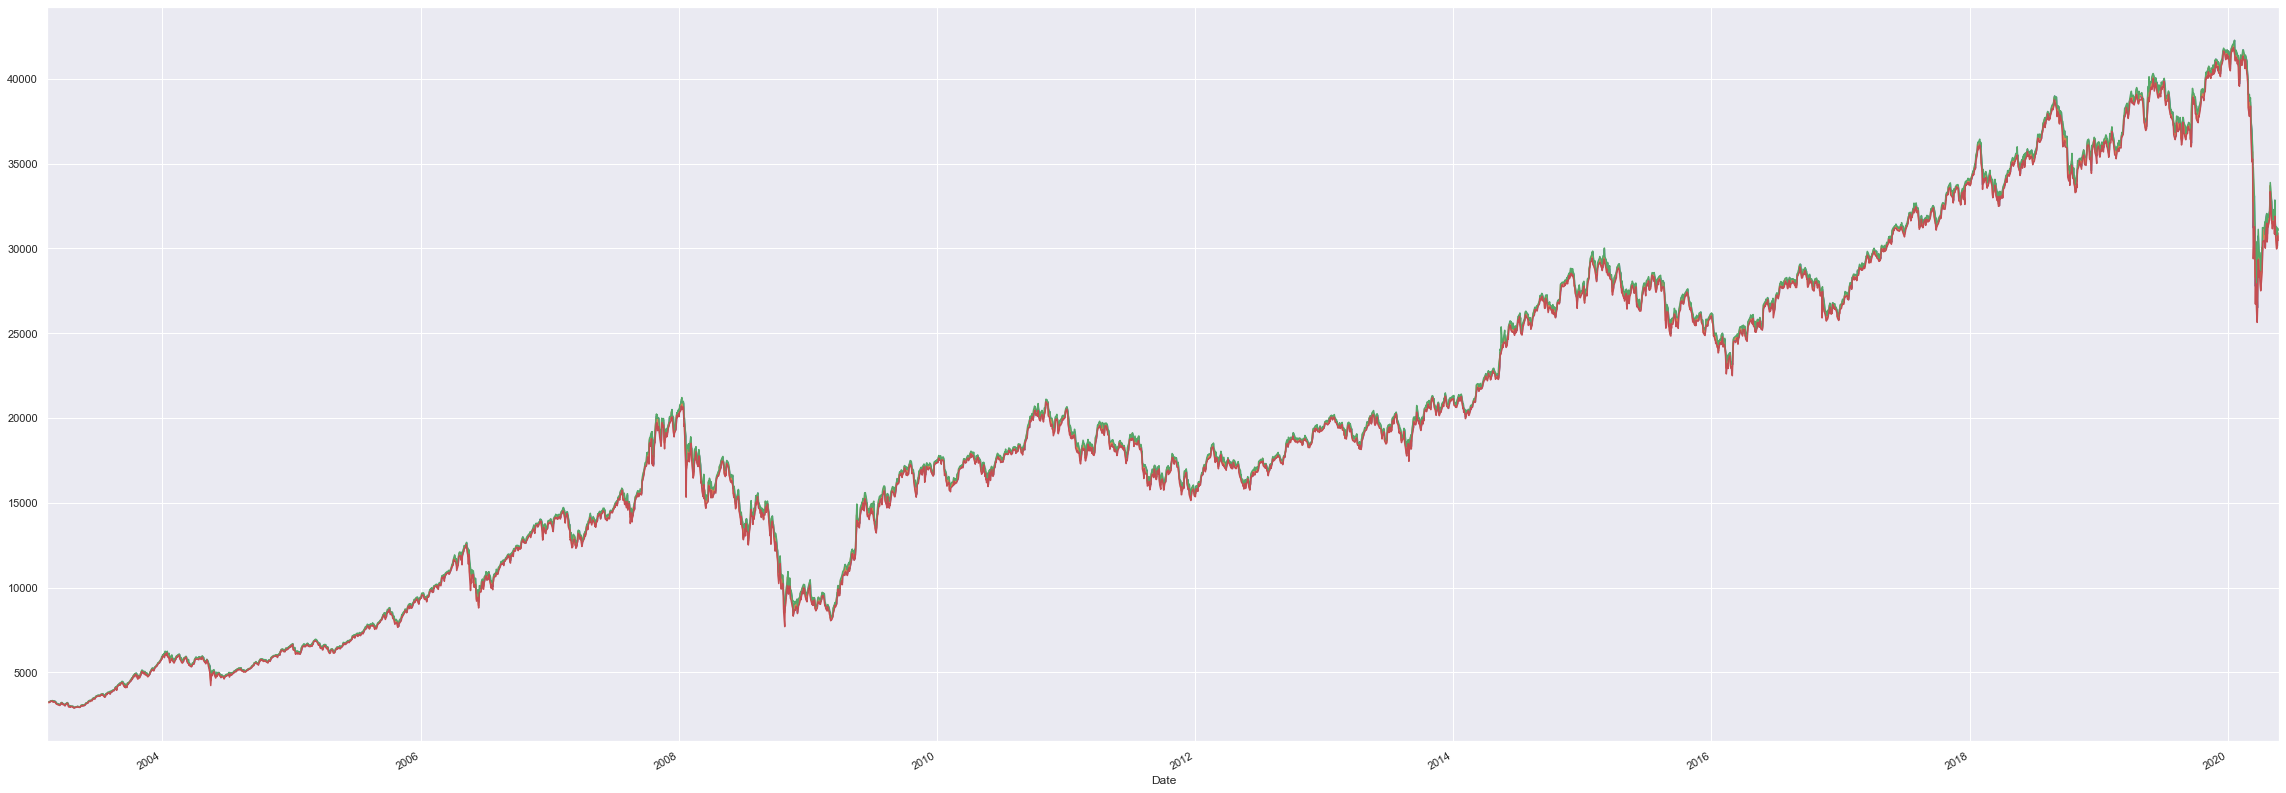

In [126]:
sensex_data['Open'].plot(x='Date',figsize=(40,15))
sensex_data['Close'].plot(x='Date',figsize=(40,15))
sensex_data['High'].plot(x='Date',figsize=(40,15))
sensex_data['Low'].plot(x='Date',figsize=(40,15))

In [184]:
sensex_data.index = sensex_data['Date']

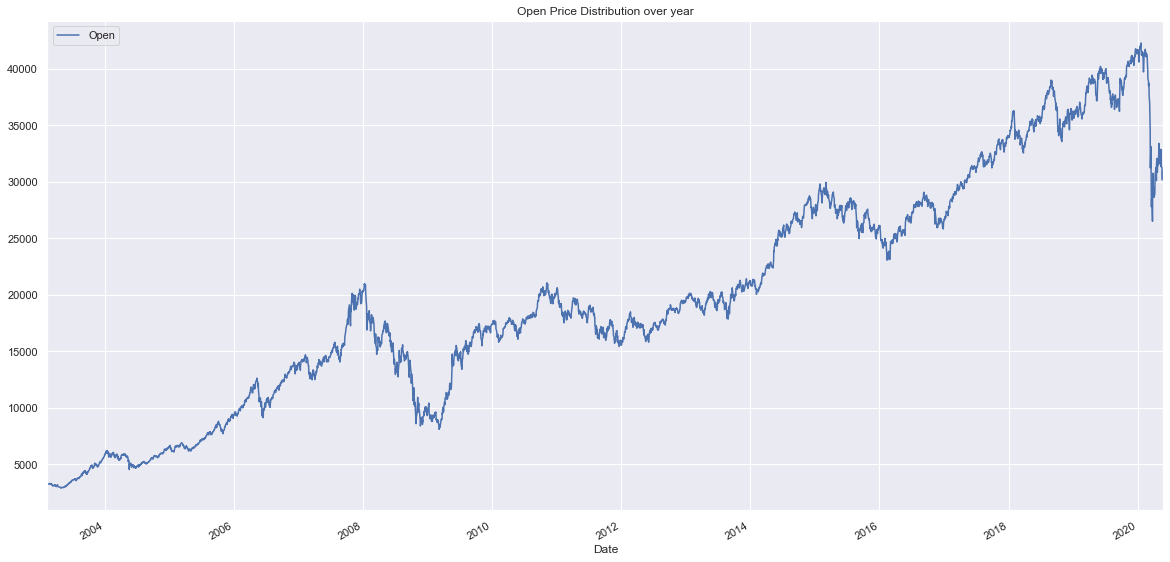

In [142]:
plt.figure(figsize=(20,10))
# plt.subplot(4,1,1)
sensex_data.Open.plot(title='Open Price Distribution over year',legend=True)
# plt.subplot(4,1,2)
#lets plot data quarterly

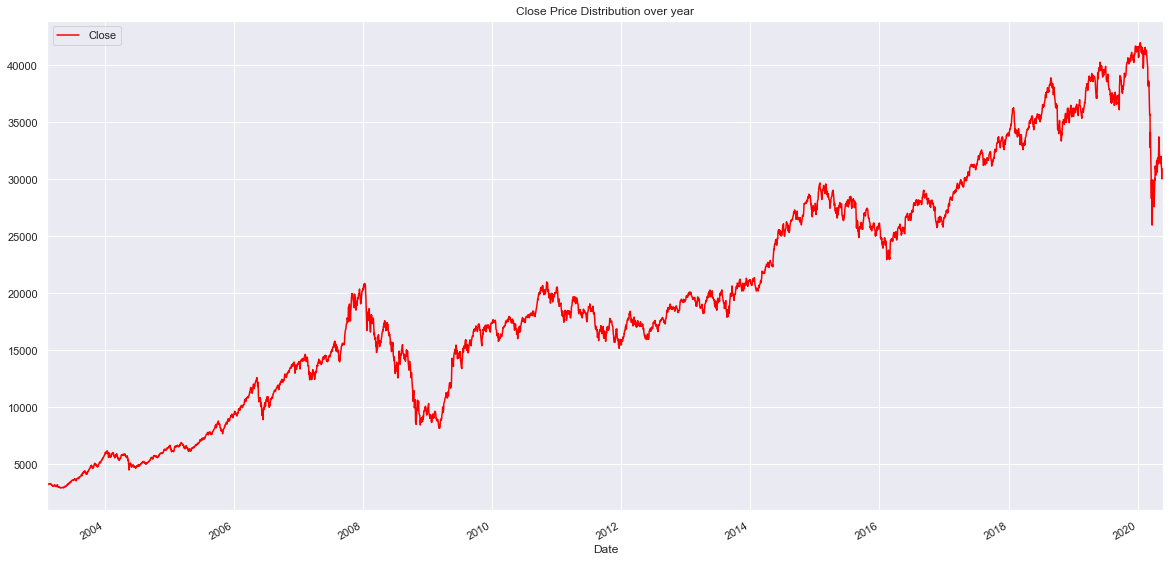

In [144]:
plt.figure(figsize=(20,10))
sensex_data.Close.plot(title='Close Price Distribution over year',color='red',legend=True)
# plt.subplot(4,1,3)
#lets plot data quarterly

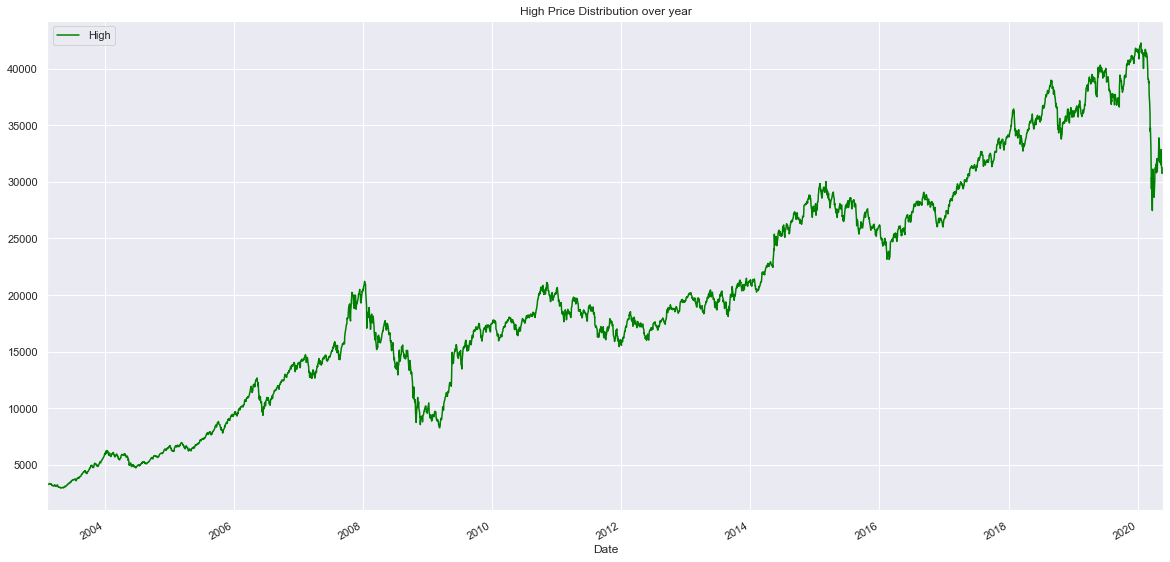

In [145]:
plt.figure(figsize=(20,10))

sensex_data.High.plot(title='High Price Distribution over year', color='green',legend=True)
# plt.subplot(4,1,4)
#lets plot data quarterly

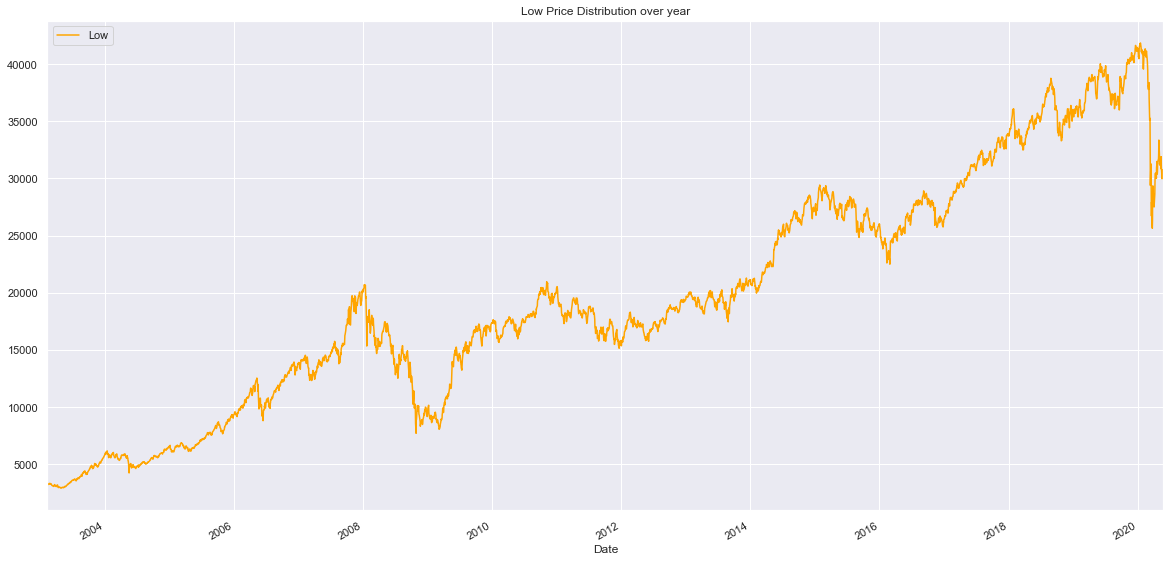

In [149]:
plt.figure(figsize=(20,10))

sensex_data.Low.plot(title='Low Price Distribution over year',color='orange',legend=True)

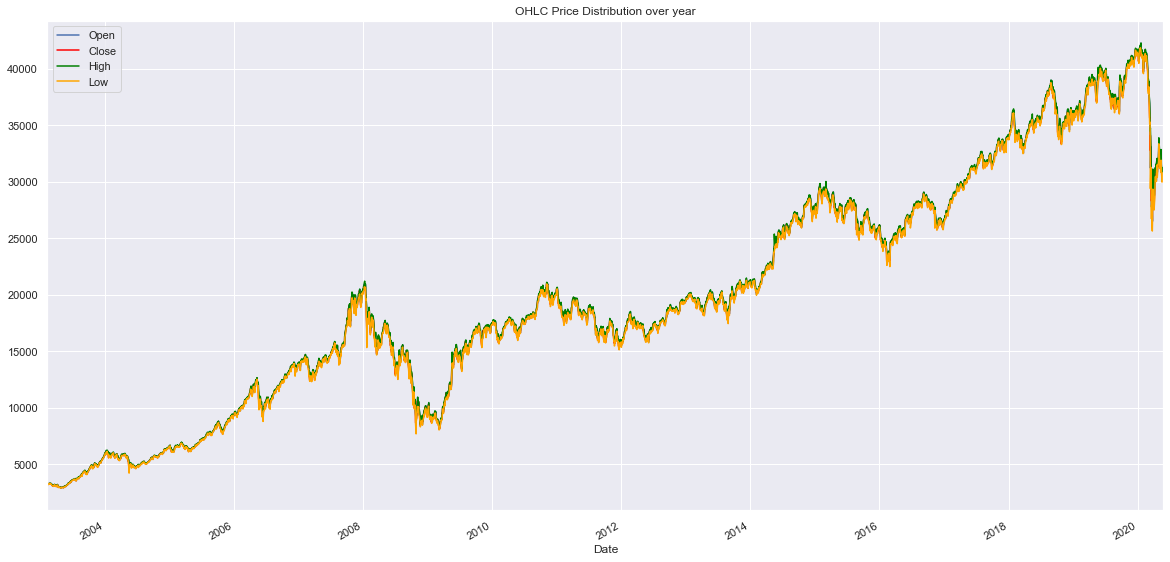

In [150]:
plt.figure(figsize=(20,10))
# plt.subplot(4,1,1)
sensex_data.Open.plot(title='OHLC Price Distribution over year',legend=True)
sensex_data.Close.plot(color='red',legend=True)
sensex_data.High.plot(color='green',legend=True)
sensex_data.Low.plot(color='orange',legend=True)

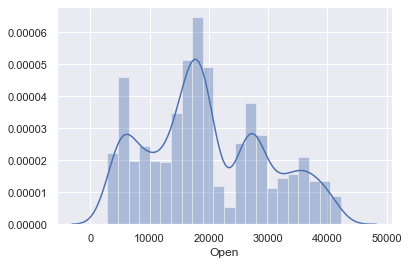

In [151]:
sns.distplot(sensex_data["Open"])

Text(0.5, 1.02, 'Pairwise Distibution of OHLC Prices')

<Figure size 1440x1440 with 0 Axes>

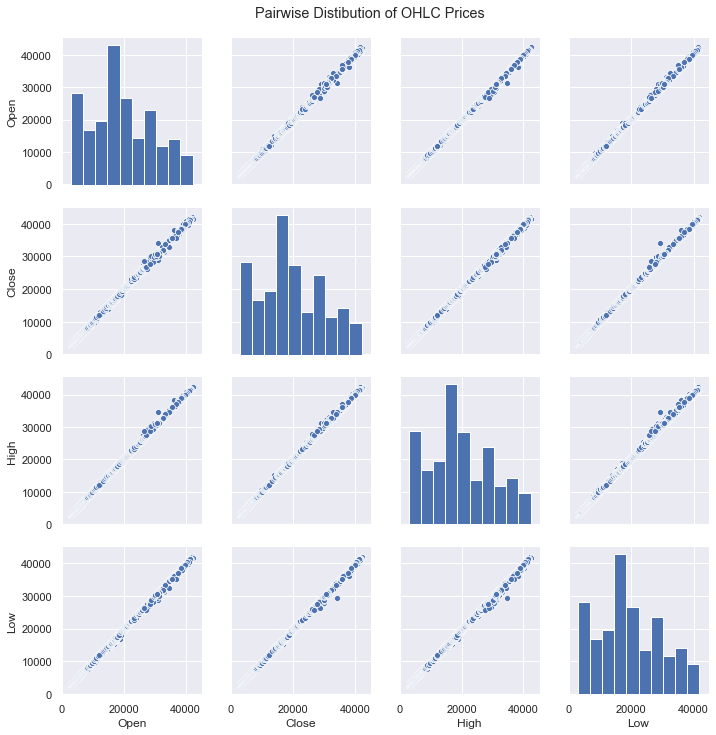

In [164]:
plt.figure(figsize=(20,20))
# plt.suptitle("Pairwise Distibution of OHLC Prices", y=1.08)
g = sns.pairplot(data=sensex_data[['Open','Close','High','Low']])
g.fig.suptitle("Pairwise Distibution of OHLC Prices", y=1.02)

In [153]:
corr = sensex_data[['Open','Close','High','Low']].corr()

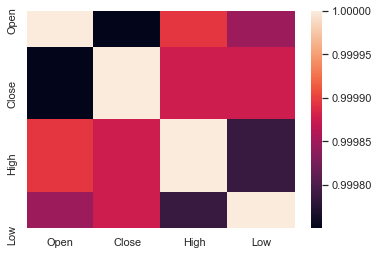

In [154]:
sns.heatmap(corr)

In [165]:
#Create the "L14" column in the DataFrame
sensex_data['L14'] = sensex_data['Low'].rolling(window=14).min()

#Create the "H14" column in the DataFrame
sensex_data['H14'] = sensex_data['High'].rolling(window=14).max()

#Create the "%K" column in the DataFrame
sensex_data['%K'] = 100*((sensex_data['Close'] - sensex_data['L14']) / (sensex_data['H14'] - sensex_data['L14']) )

#Create the "%D" column in the DataFrame
sensex_data['%D'] = sensex_data['%K'].rolling(window=3).mean()

Text(0.5, 1.0, 'Close')

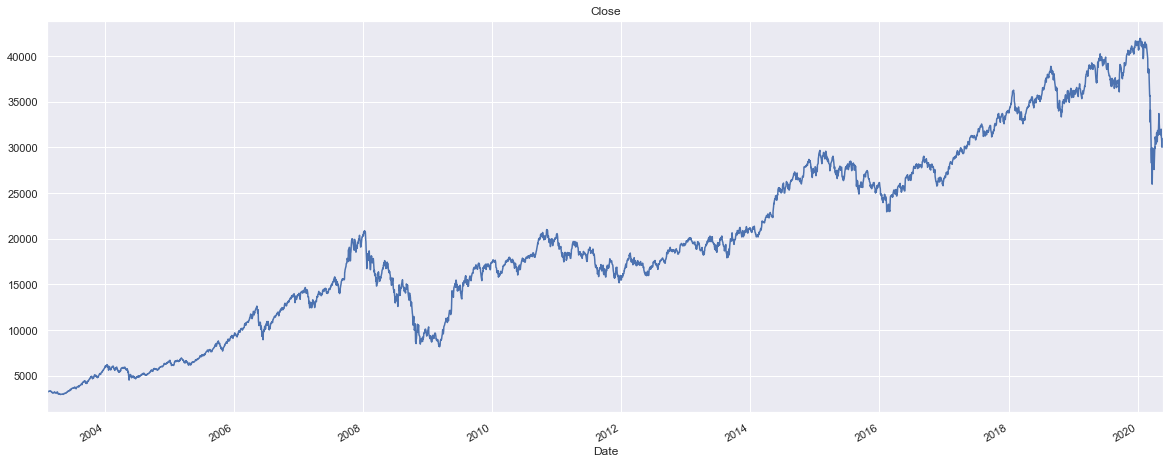

In [173]:
fig, axes = plt.subplots(figsize=(20,8))
sensex_data['Close'].plot(ax=axes); axes.set_title('Close')

Text(0.5, 1.0, 'Oscillator')

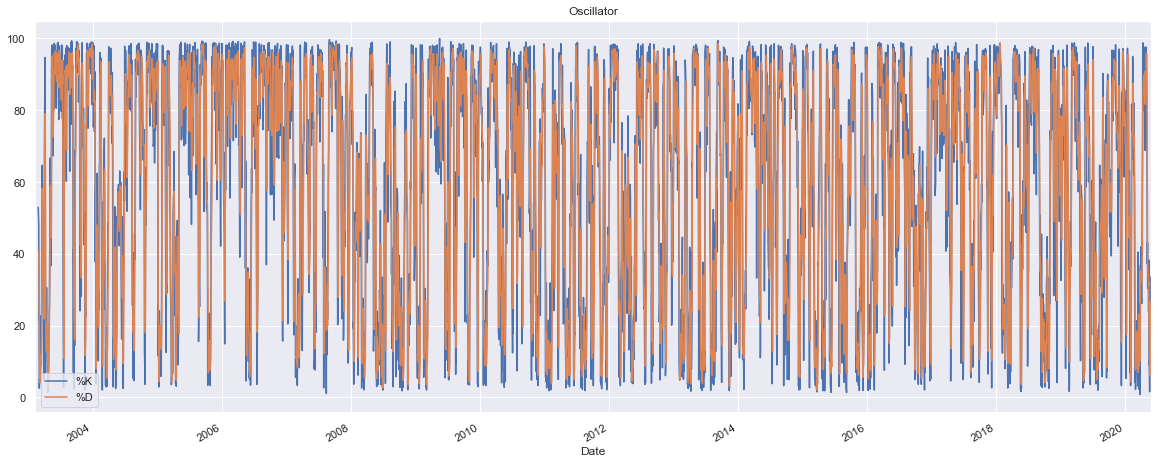

In [174]:
fig, axes = plt.subplots(figsize=(20,8))
sensex_data[['%K','%D']].plot(ax=axes); axes.set_title('Oscillator')

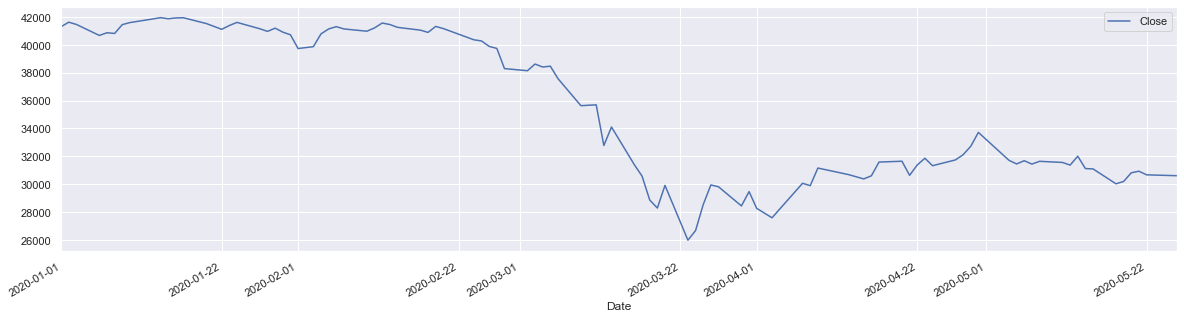

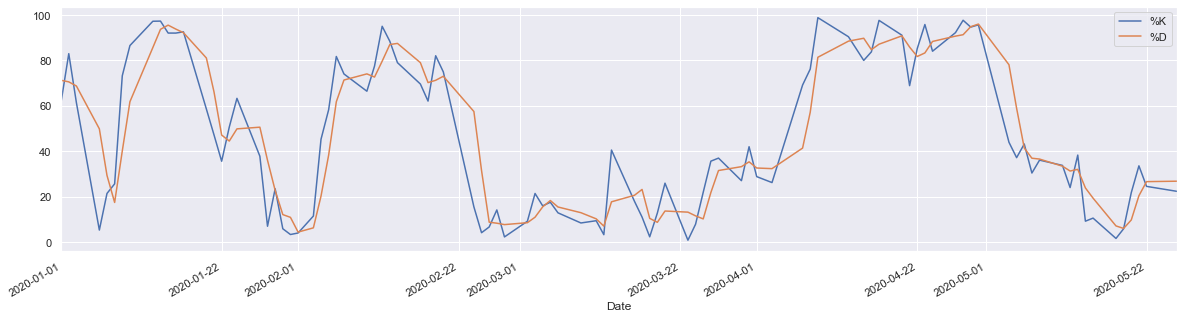

In [180]:
sensex_data['2020-01-01':].plot(y=['Close'], figsize = (20, 5))
sensex_data['2020-01-01':].plot(y=['%K', '%D'], figsize = (20, 5))

In [182]:
# sensex_data.reset_index(inplace=True,drop=True)

In [183]:
for i in range(4,sensex_data.shape[0]):
    sensex_data.loc[i,'Momentum'] = sensex_data.loc[i,'Close'] - sensex_data.loc[i-4,'Close']
#     if sensex_data.loc[i-4,'Close'] < sensex_data.loc[i,'Open']:
#         sensex_data.loc[i,'Target_Var'] = 1
#     else:
#         sensex_data.loc[i,'Target_Var'] = 0

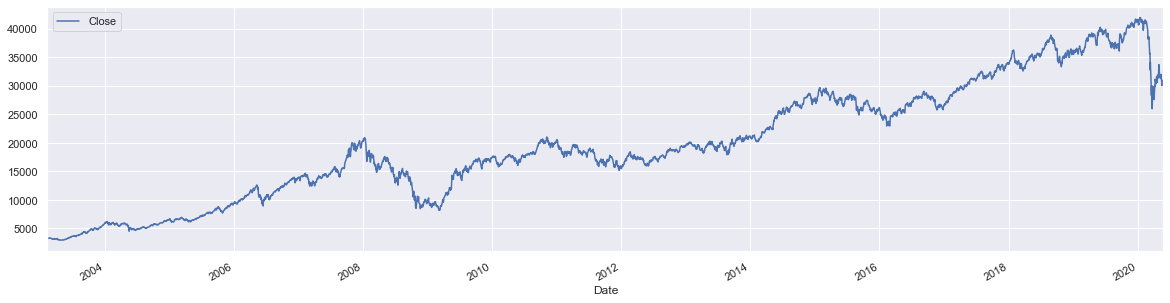

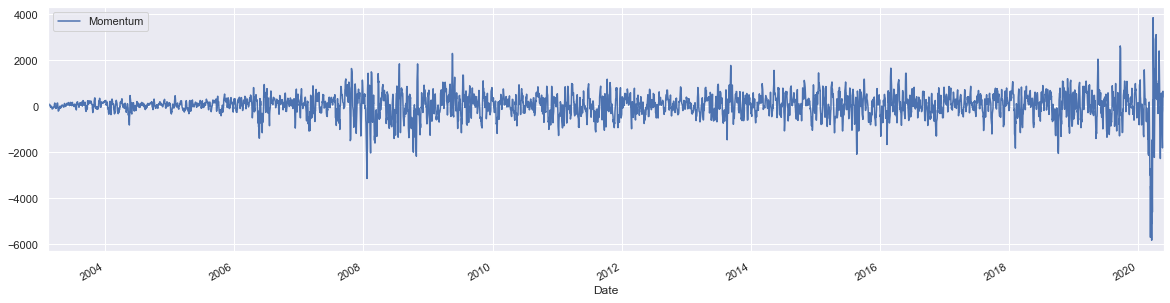

In [186]:
sensex_data.plot(y=['Close'], figsize = (20, 5))
sensex_data.plot(y=['Momentum'], figsize = (20, 5))

In [188]:
from ta.momentum import williams_r

In [190]:
sensex_data['williams_r'] = williams_r(high=sensex_data['High'],low=sensex_data['Low'],close=sensex_data['Close'])

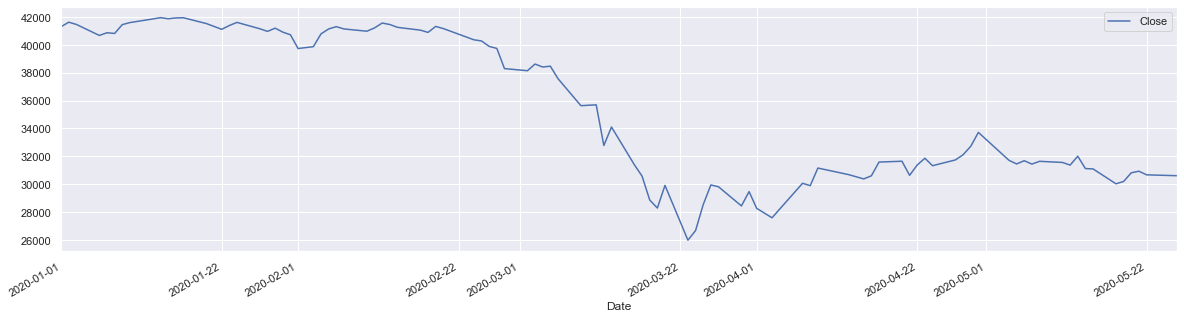

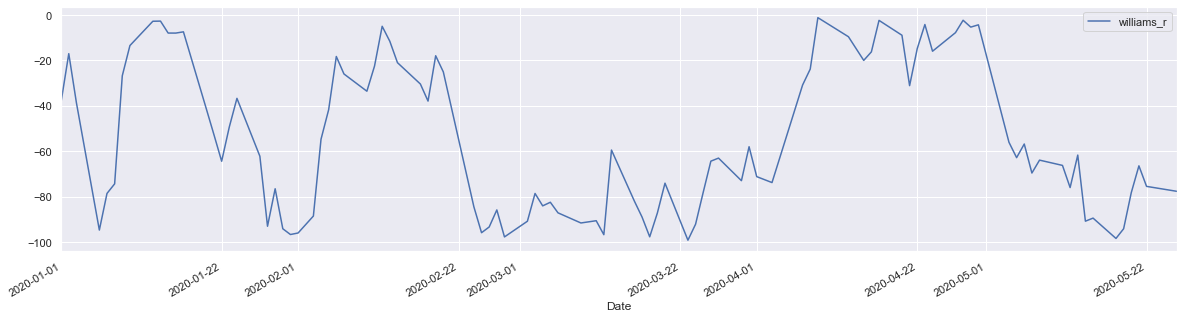

In [192]:
sensex_data['2020-01-01':].plot(y=['Close'], figsize = (20, 5))
sensex_data['2020-01-01':].plot(y=['williams_r'], figsize = (20, 5))

In [193]:
sensex_data['MA5'] = sensex_data['Close'].rolling(window=5).mean()

In [194]:
sensex_data['Disparity5'] = (sensex_data['Close'] - sensex_data['MA5'])/(sensex_data['MA5'] * 100)

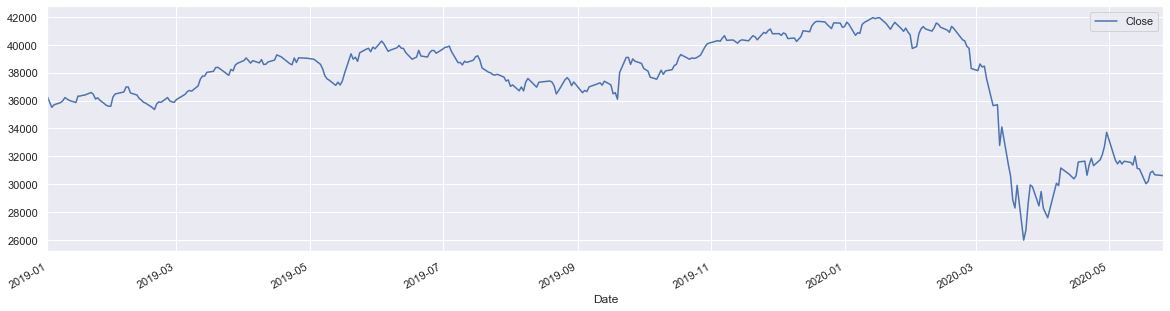

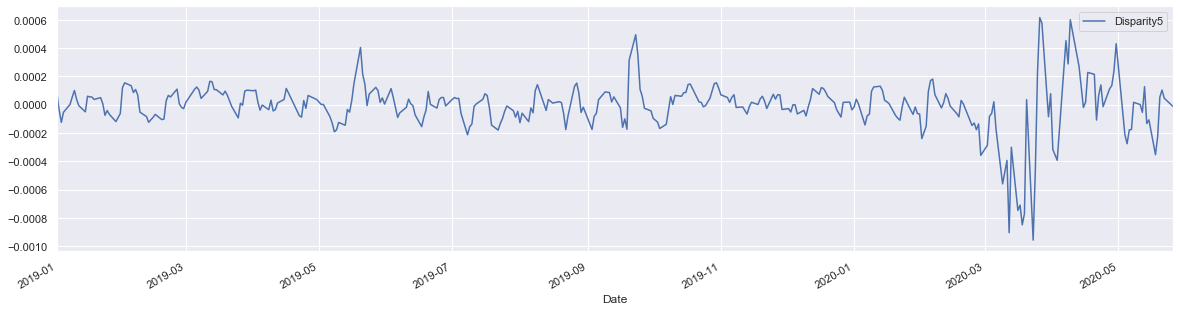

In [198]:
sensex_data['2019-01-01':].plot(y=['Close'], figsize = (20, 5))
sensex_data['2019-01-01':].plot(y=['Disparity5'], figsize = (20, 5))

In [203]:
import plotly.graph_objects as go

In [213]:
temp = sensex_data['2020-03-01':'2020-04-01']
fig = go.Figure(data=[go.Candlestick(x=temp['Date'],
                open=temp['Open'],
                high=temp['High'],
                low=temp['Low'],
                close=temp['Close'])])

fig.show()